In [1]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import matplotlib.pyplot as plt
import scipy

import sys
sys.path.append('..')
from cann import CANN1D

import warnings
warnings.filterwarnings("ignore")

#for reproducibility
seed = 123


/home/zilong/anaconda3/envs/anticipative_track/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### replay at three adaptation strength

In [2]:
dt = bm.get_dt()
replay_dur = 200         #simulate 200 ms, roughly the length of a SWR
init_dur = 50 #initial 10 ms to let the network settle

#build and run the network
#set default ramndom seed for reproducibility
np.random.seed(seed)
#set backend to cpu
bm.set_platform('cpu')

replay_cann_1 = CANN1D(tau=1., tau_v=48., num=128, mbar=0)
replay_cann_1.reset_state()
Iext, length = bp.inputs.section_input(
    values=[replay_cann_1.get_stimulus_by_pos(-3/4*np.pi), 0.], #initial position of the bump
    durations=[init_dur, replay_dur],
    return_length=True
)
noise = 0.02* np.random.randn(len(Iext), replay_cann_1.num) #add independent noise to the input with level 0.02
Iext = Iext + noise
Iext = bm.as_numpy(Iext)

#run the network
replay_runner_1 = bp.DSRunner(replay_cann_1,
                     inputs=('input', Iext, 'iter'),
                     monitors=['r'])

replay_runner_1.run(length)

#############################################################################################################
#set default ramndom seed for reproducibility
np.random.seed(seed)
#set backend to cpu
bm.set_platform('cpu')
#build and run the network
replay_cann_2 = CANN1D(tau=1., tau_v=48., num=128, mbar=1.5)
replay_cann_2.reset_state()
Iext, length = bp.inputs.section_input(
    values=[replay_cann_2.get_stimulus_by_pos(-3/4*np.pi), 0.], #initial position of the bump
    durations=[init_dur, replay_dur],
    return_length=True
)
noise = 0.02* np.random.randn(len(Iext), replay_cann_2.num) #add independent noise to the input with level 0.02
Iext = Iext + noise
Iext = bm.as_numpy(Iext)

#run the network
replay_runner_2 = bp.DSRunner(replay_cann_2,
                     inputs=('input', Iext, 'iter'),
                     monitors=['r'])

replay_runner_2.run(length)

#############################################################################################################
#set default ramndom seed for reproducibility
np.random.seed(seed)
#set backend to cpu
bm.set_platform('cpu')
#build and run the network
replay_cann_3 = CANN1D(tau=1., tau_v=48., num=128, mbar=3.5)
replay_cann_3.reset_state()
Iext, length = bp.inputs.section_input(
    values=[replay_cann_2.get_stimulus_by_pos(-3/4*np.pi), 0.], #initial position of the bump
    durations=[init_dur, replay_dur],
    return_length=True
)
noise = 0.02* np.random.randn(len(Iext), replay_cann_3.num) #add independent noise to the input with level 0.02
Iext = Iext + noise
Iext = bm.as_numpy(Iext)

#run the network
replay_runner_3 = bp.DSRunner(replay_cann_3,
                     inputs=('input', Iext, 'iter'),
                     monitors=['r'])

replay_runner_3.run(length)


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
Predict 2500 steps: : 100%|██████████| 2500/2500 [00:00<00:00, 8659.48it/s]


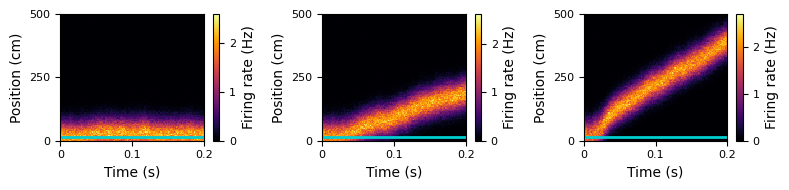

In [3]:
#make two subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 2))
#set font size
labelsize = 10
ticksize = 8


########
#plot 1#
########

fr = replay_runner_1.mon.r.T
pos = np.linspace(-np.pi,np.pi,replay_cann_1.num)
replay_steps = int(replay_dur / dt)
time = np.linspace(init_dur, replay_dur+init_dur, replay_steps)
init_index = int(init_dur/dt)
c = axs[0].pcolormesh(time[::5]-time[0], pos, fr[:,init_index:-1:5]*1e3, cmap='inferno')
axs[0].set_xlim((0,200))
clb = plt.colorbar(c, ax=axs[0], location='right', ticks=[0, 1, 2])
clb.set_label('Firing rate (Hz)', fontsize=labelsize)
clb.ax.tick_params(labelsize=ticksize)

#add an horizontal line to indicate the position of the bump at y=-3/4*np.pi
axs[0].plot([0,200],[-3/4*np.pi,-3/4*np.pi],color='darkturquoise',linewidth=2, alpha=1)

#set xlim and ylim
axs[0].set_xlim([0, 200])
axs[0].set_ylim([-2.5,2.5])
#set x and y labels
axs[0].set_xlabel('Time (s)', fontsize=labelsize)
axs[0].set_ylabel('Position (cm)', fontsize=labelsize)

# set x and y ticks
xticks = np.linspace(0, 200, 3)
yticks = np.linspace(-2.5,2.5,3)
#set tick labels
xticklabels = [0, 0.1, 0.2]
yticklabels = [0, int(2.5*100), int(5*100)]

axs[0].set_xticks(xticks)
axs[0].set_yticks(yticks)
axs[0].set_xticklabels(xticklabels, fontsize=ticksize)
axs[0].set_yticklabels(yticklabels, fontsize=ticksize)

axs[0].tick_params(axis='x', labelsize=ticksize)
axs[0].tick_params(axis='y', labelsize=ticksize)

#####################################################################

fr = replay_runner_2.mon.r.T
pos = np.linspace(-np.pi,np.pi,replay_cann_2.num)
replay_steps = int(replay_dur / dt)
time = np.linspace(init_dur, replay_dur+init_dur, replay_steps)
init_index = int(init_dur/dt)

c = axs[1].pcolormesh(time[::5]-time[0], pos, fr[:,init_index:-1:5]*1e3, cmap='inferno')
axs[1].set_xlim((0,200))
clb = plt.colorbar(c, ax=axs[1], location='right', ticks=[0, 1, 2])
clb.set_label('Firing rate (Hz)', fontsize=labelsize)
clb.ax.tick_params(labelsize=ticksize)
   
#add an horizontal line to indicate the position of the bump at y=-3/4*np.pi 
axs[1].plot([0,200],[-3/4*np.pi,-3/4*np.pi],color='darkturquoise',linewidth=2, alpha=1)
    
#set xlim and ylim
axs[1].set_xlim([0, 200])
axs[1].set_ylim([-2.5,2.5])
#set x and y labels
axs[1].set_xlabel('Time (s)', fontsize=labelsize)
axs[1].set_ylabel('Position (cm)', fontsize=labelsize)

# set x and y ticks
xticks = np.linspace(0, 200, 3)
yticks = np.linspace(-2.5,2.5,3)
#set tick labels
xticklabels = [0, 0.1, 0.2]
yticklabels = [0, int(2.5*100), int(5*100)]

axs[1].set_xticks(xticks)
axs[1].set_yticks(yticks)
axs[1].set_xticklabels(xticklabels, fontsize=ticksize)
axs[1].set_yticklabels(yticklabels, fontsize=ticksize)

axs[1].tick_params(axis='x', labelsize=ticksize)
axs[1].tick_params(axis='y', labelsize=ticksize)

#############################################################################################################
fr = replay_runner_3.mon.r.T
pos = np.linspace(-np.pi,np.pi,replay_cann_2.num)
replay_steps = int(replay_dur / dt)
time = np.linspace(init_dur, replay_dur+init_dur, replay_steps)
init_index = int(init_dur/dt)

c = axs[2].pcolormesh(time[::5]-time[0], pos, fr[:,init_index:-1:5]*1e3, cmap='inferno')
axs[2].set_xlim((0,200))
clb = plt.colorbar(c, ax=axs[2], location='right', ticks=[0, 1, 2])
clb.set_label('Firing rate (Hz)', fontsize=labelsize)
clb.ax.tick_params(labelsize=ticksize)
   
#add an horizontal line to indicate the position of the bump at y=-3/4*np.pi 
axs[2].plot([0,200],[-3/4*np.pi,-3/4*np.pi],color='darkturquoise',linewidth=2, alpha=1)
    
#set xlim and ylim
axs[2].set_xlim([0, 200])
axs[2].set_ylim([-2.5,2.5])
#set x and y labels
axs[2].set_xlabel('Time (s)', fontsize=labelsize)
axs[2].set_ylabel('Position (cm)', fontsize=labelsize)

# set x and y ticks
xticks = np.linspace(0, 200, 3)
yticks = np.linspace(-2.5,2.5,3)
#set tick labels
xticklabels = [0, 0.1, 0.2]
yticklabels = [0, int(2.5*100), int(5*100)]

axs[2].set_xticks(xticks)
axs[2].set_yticks(yticks)
axs[2].set_xticklabels(xticklabels, fontsize=ticksize)
axs[2].set_yticklabels(yticklabels, fontsize=ticksize)

axs[2].tick_params(axis='x', labelsize=ticksize)
axs[2].tick_params(axis='y', labelsize=ticksize)

plt.tight_layout()

#save
plt.savefig('/home/zilong/Desktop/AdaptiveAttractorForSequences/Figures/Fig2_replay_three_adaptation_strength.pdf', bbox_inches='tight', dpi=300)
